## Import necessary libaries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
wine = pd.read_csv('wine (1).csv')
wine

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


## Data understanding

In [3]:
wine.shape

(178, 14)

In [4]:
wine.isna().sum()

Type               0
Alcohol            0
Malic              0
Ash                0
Alcalinity         0
Magnesium          0
Phenols            0
Flavanoids         0
Nonflavanoids      0
Proanthocyanins    0
Color              0
Hue                0
Dilution           0
Proline            0
dtype: int64

In [5]:
wine.dtypes

Type                 int64
Alcohol            float64
Malic              float64
Ash                float64
Alcalinity         float64
Magnesium            int64
Phenols            float64
Flavanoids         float64
Nonflavanoids      float64
Proanthocyanins    float64
Color              float64
Hue                float64
Dilution           float64
Proline              int64
dtype: object

## Minmax scalar

In [3]:
from sklearn.preprocessing import MinMaxScaler

In [4]:
min_max = MinMaxScaler()
wine_scaled = min_max.fit_transform(wine.iloc[:,1:])
wine_scaled = pd.DataFrame(wine_scaled,columns=wine.iloc[:,1:].columns)

## Applying PCA

In [5]:
from sklearn.decomposition import PCA

In [6]:
pca = PCA(n_components=3)
wine_pca = pca.fit_transform(wine_scaled)

## Heirarchial clustering

In [7]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import pdist

In [8]:
xdist=pdist(wine_pca,metric="euclidean")

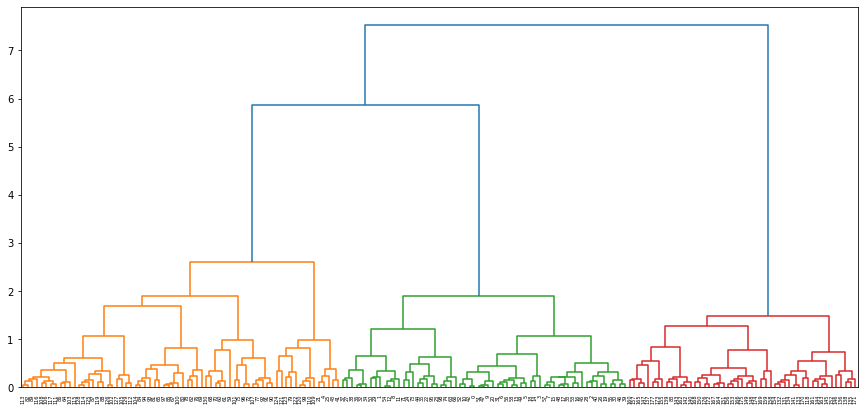

In [9]:
linked = linkage(xdist, 'ward')

plt.figure(figsize=(15, 7))
dendrogram(linked,
            orientation='top',
            distance_sort='descending',
            show_leaf_counts=True)
plt.show()

In [10]:
heirarchial = AgglomerativeClustering(n_clusters=3,affinity='euclidean',linkage='ward')
heirarchial_pred = heirarchial.fit_predict(wine_pca)

## Kmeans

In [11]:
from sklearn.cluster import KMeans

In [12]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(wine_pca)
kmeans_pred = kmeans.predict(wine_pca)

## Optimum kmeans cluster

In [13]:
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(wine_pca)
    wcss.append(kmeans.inertia_)

In [14]:
wcss

[65.27680504589121,
 34.29463958796958,
 18.938260830466454,
 15.666001148083451,
 13.534140669159193,
 11.482848946201065,
 10.4453280207719,
 9.443187631537494,
 8.616705680708447,
 7.925105689129491]

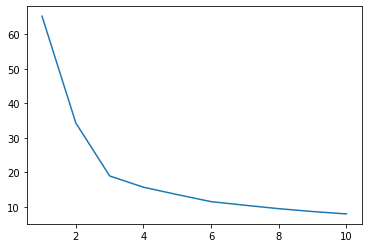

In [15]:
plt.plot(range(1,11),wcss)
plt.show()

## Observation

### 3 is optimum cluster

## Compare to orginal data

In [16]:
wine['heirarchial'] = heirarchial_pred
wine['kmeans']      = kmeans_pred

In [17]:
wine

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,heirarchial,kmeans
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,2,1
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,2,1
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,2,1
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,2,1
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,1,2
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,1,2
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,1,2
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,1,2


## =========================== End ====================================